In [ ]:
#%%

# MA Cross Backtesting on 1H BTC with following trade costs and timeframes
# - Slippage is 0.5BPS
# - Taker fee is 0.05%
# - Initial capital is 10000.0$
# - Position size per trade is 2% of account
# - Timeframe is 1H
# 

In [ ]:
#%%

import warnings
warnings.filterwarnings("ignore")
def action_with_warnings():
    warnings.warn("should not appear")
with warnings.catch_warnings(record=True):
    action_with_warnings()
import yfinance          as yf
import pandas            as pd
import numpy             as np
import quantstats        as qs
import matplotlib.pyplot as plt

In [ ]:
#%%

df = yf.download('BTC-USD', interval='1h', period='23mo')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-05-08 10:00:00+00:00,34590.132812,34777.445312,34565.531250,34736.707031,34736.707031,0
2022-05-08 11:00:00+00:00,34737.507812,34834.500000,34734.191406,34783.015625,34783.015625,277211136
2022-05-08 12:00:00+00:00,34784.156250,34818.761719,34632.125000,34644.054688,34644.054688,145690624
2022-05-08 13:00:00+00:00,34645.781250,34661.250000,34443.843750,34443.843750,34443.843750,341708800
2022-05-08 14:00:00+00:00,34445.277344,34552.015625,34395.136719,34466.621094,34466.621094,1075826688
...,...,...,...,...,...,...
2024-04-08 06:00:00+00:00,69718.156250,69794.460938,69663.187500,69784.273438,69784.273438,198227968
2024-04-08 07:00:00+00:00,69794.031250,70819.679688,69794.031250,70700.390625,70700.390625,1857765376
2024-04-08 08:00:00+00:00,70701.273438,72049.515625,70701.273438,71933.351562,71933.351562,3308257280


<Axes: xlabel='Datetime'>

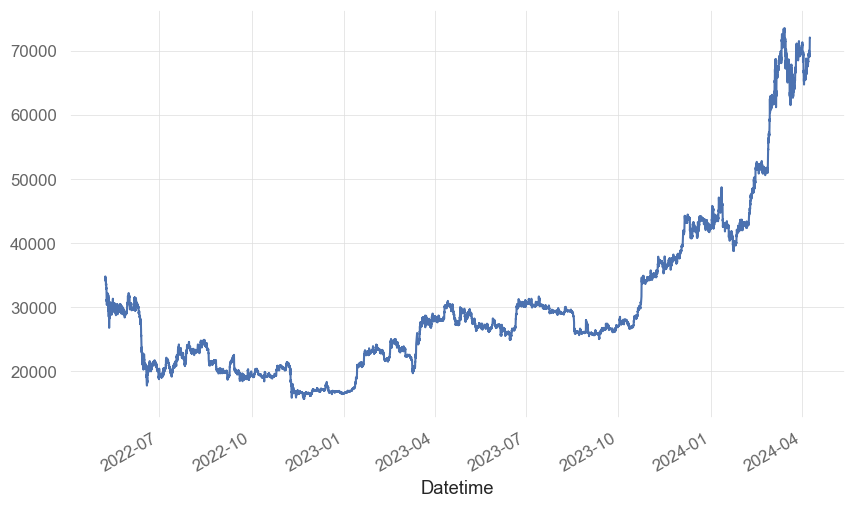

In [ ]:
#%%

df['Close'].plot()

In [ ]:
#%%

df['Price'] = df['Open'].shift(-1)

df

,Open,High,Low,Close,Adj Close,Volume,Price
Datetime,,,,,,,
2022-05-08 10:00:00+00:00,34590.132812,34777.445312,34565.531250,34736.707031,34736.707031,0,34737.507812
2022-05-08 11:00:00+00:00,34737.507812,34834.500000,34734.191406,34783.015625,34783.015625,277211136,34784.156250
2022-05-08 12:00:00+00:00,34784.156250,34818.761719,34632.125000,34644.054688,34644.054688,145690624,34645.781250
2022-05-08 13:00:00+00:00,34645.781250,34661.250000,34443.843750,34443.843750,34443.843750,341708800,34445.277344
2022-05-08 14:00:00+00:00,34445.277344,34552.015625,34395.136719,34466.621094,34466.621094,1075826688,34465.386719
...,...,...,...,...,...,...,...
2024-04-08 06:00:00+00:00,69718.156250,69794.460938,69663.187500,69784.273438,69784.273438,198227968,69794.031250
2024-04-08 07:00:00+00:00,69794.031250,70819.679688,69794.031250,70700.390625,70700.390625,1857765376,70701.273438
2024-04-08 08:00:00+00:00,70701.273438,72049.515625,70701.273438,71933.351562,71933.351562,3308257280,71958.554688


In [ ]:
#%%

df.dropna(inplace=True)

In [ ]:
#%%

# Signal extraction

df['MA50' ] = df['Close'].rolling(window=50 ).mean()
df['MA200'] = df['Close'].rolling(window=150).mean()

df['Signal'] = 0
df.loc[((df['MA50'] > df['MA200']) & (df['MA50'].shift(1) <= df['MA200'].shift(1))), 'Signal'] =  1
df.loc[((df['MA50'] < df['MA200']) & (df['MA50'].shift(1) >= df['MA200'].shift(1))), 'Signal'] = -1

In [ ]:
#%%

df['Signal'].value_counts()

Signal
 0    16669
 1       67
-1       66
Name: count, dtype: int64

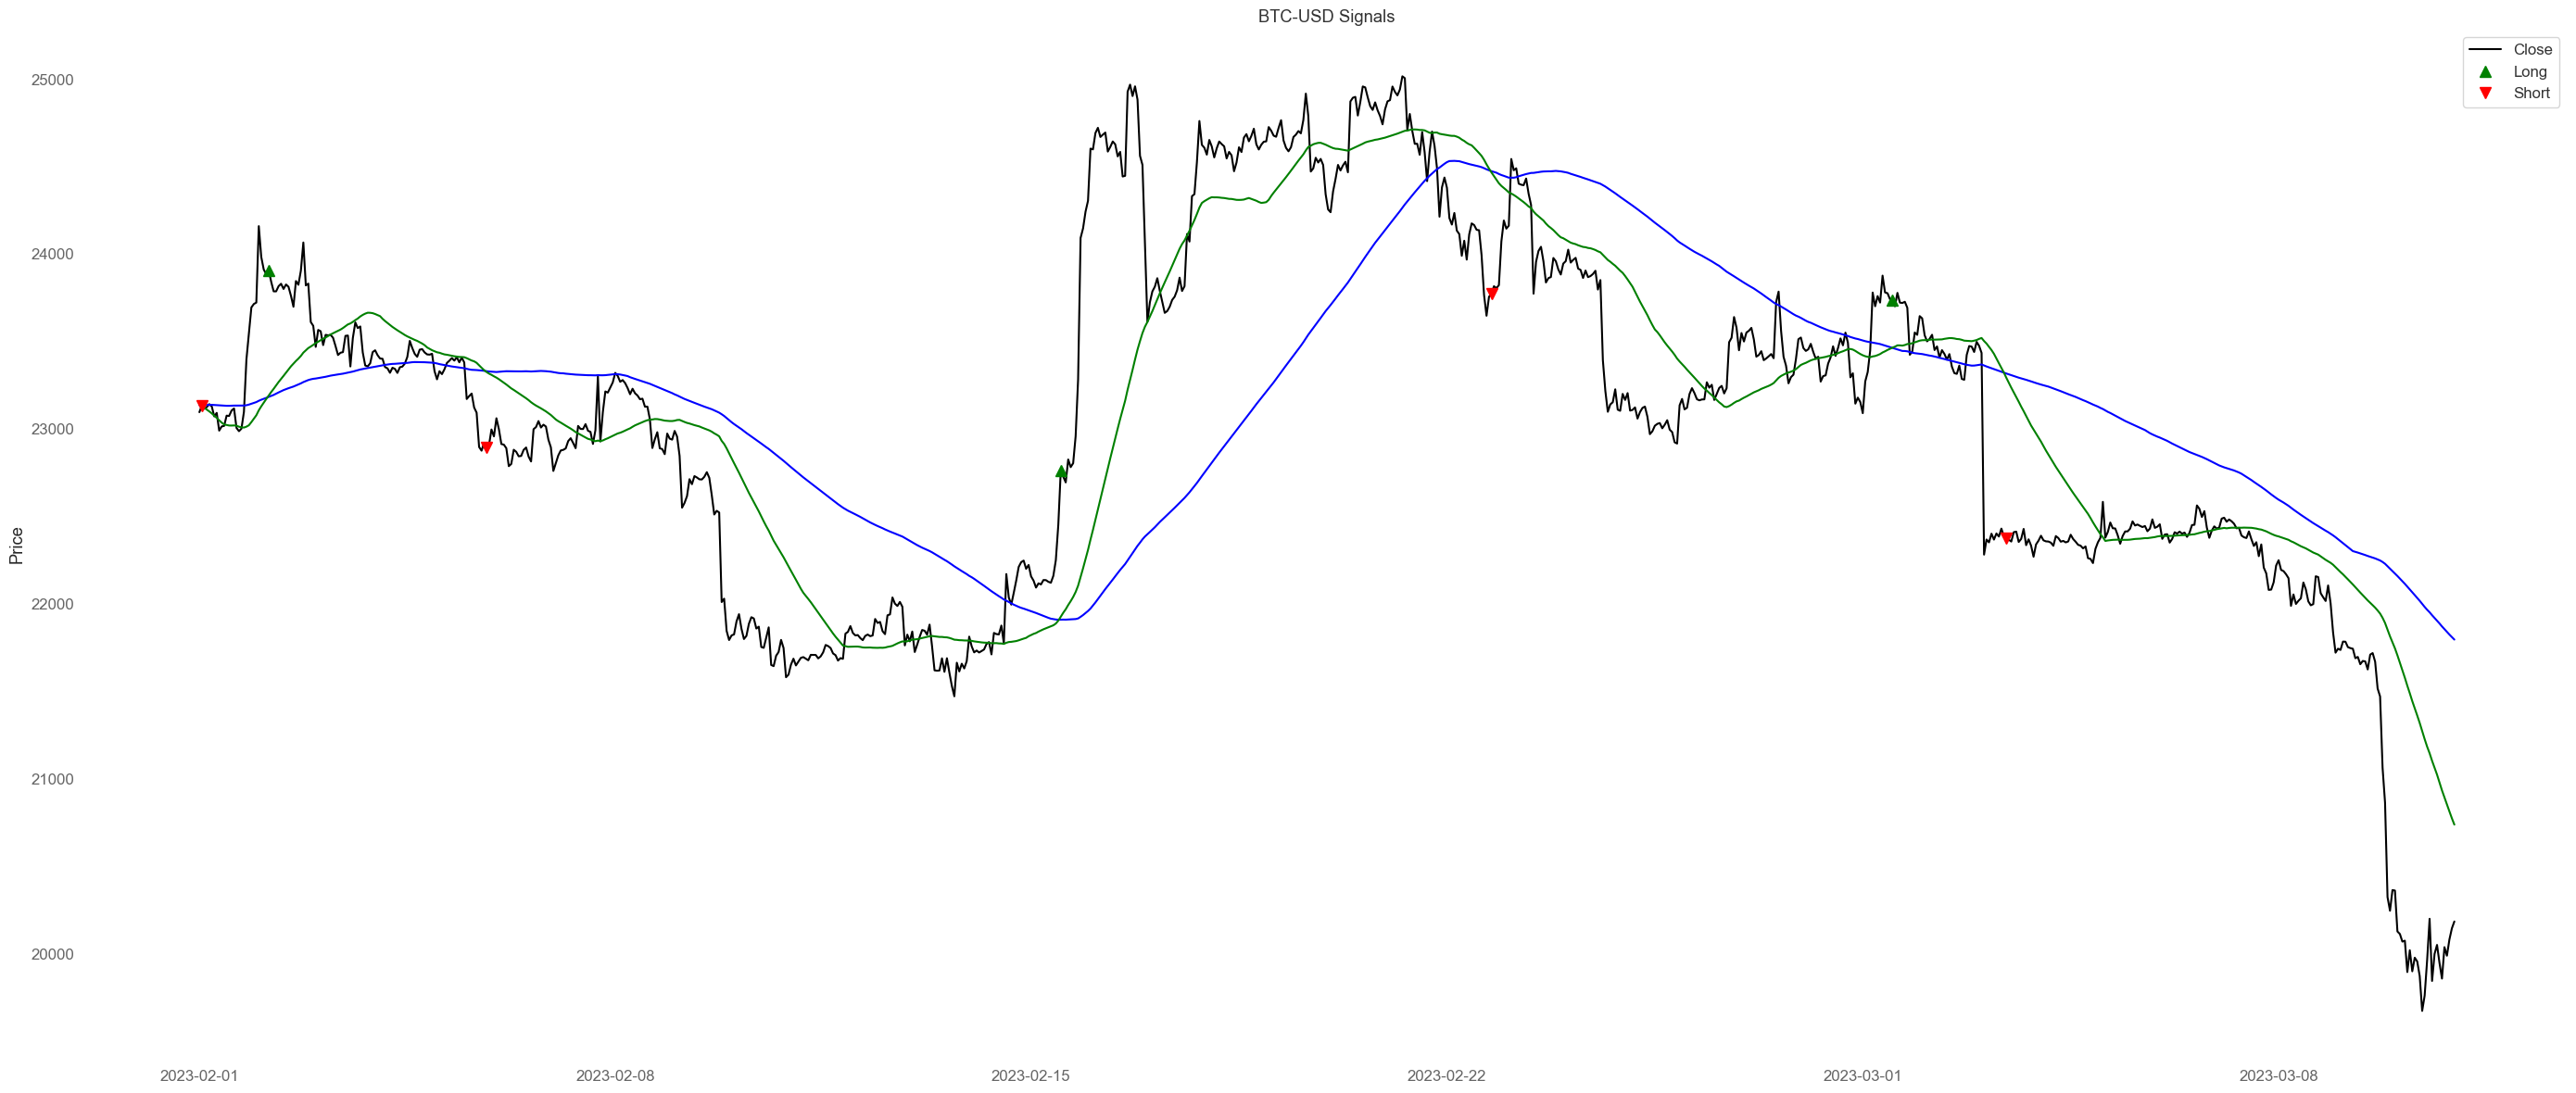

In [ ]:
#%%

plot_df = df["2023-02-01":"2023-03-10"]

fig, ax1 = plt.subplots(1, figsize=(28, 12), sharex=True)

ax1.plot(plot_df.index, plot_df['Close'], label='Close', color='black')
ax1.plot(plot_df['MA200'], color='blue' )
ax1.plot(plot_df['MA50' ], color='green')
ax1.plot(plot_df[plot_df['Signal'] ==  1].index, plot_df[plot_df['Signal'] ==  1]['Close'], '^', markersize=8, color='green', label='Long' )
ax1.plot(plot_df[plot_df['Signal'] == -1].index, plot_df[plot_df['Signal'] == -1]['Close'], 'v', markersize=8, color='red'  , label='Short')
ax1.set_ylabel('Price')
ax1.set_title('BTC-USD Signals')
ax1.legend()
ax1.grid()

plt.tight_layout()
plt.show()

In [ ]:
#%%

# Position tracking
position         = 0
entry_timestamp  = None
entry_price      = 0
exit_timestamp   = None
exit_price       = 0
position_history = []

for index, row in df.iterrows():
    if row['Signal'] != position:
        # Exit position
        if position != 0:
            exit_timestamp = index
            exit_price     = row['Price'] 
            pct_change     = (exit_price - entry_price) / entry_price
            position_history.append((entry_timestamp, exit_timestamp, entry_price, exit_price, pct_change, position))
        # Enter new position
        if row['Signal'] == 1:
            entry_timestamp = index
            entry_price     = row['Price']
        elif row['Signal'] == -1:
            entry_timestamp = index
            entry_price     = row['Price']
        position = row['Signal']

position_df = pd.DataFrame(position_history, columns=['EntryTime', 'ExitTime', 'EntryPrice', 'ExitPrice', 'Return', 'Position'])
position_df = position_df.set_index(pd.DatetimeIndex(position_df['EntryTime']))

position_df

,EntryTime,ExitTime,EntryPrice,ExitPrice,Return,Position
EntryTime,,,,,,
2022-05-16 13:00:00+00:00,2022-05-16 13:00:00+00:00,2022-05-16 14:00:00+00:00,29595.191406,29527.046875,-0.002303,1.0
2022-05-19 02:00:00+00:00,2022-05-19 02:00:00+00:00,2022-05-19 03:00:00+00:00,29145.005859,29191.943359,0.001610,-1.0
2022-05-23 09:00:00+00:00,2022-05-23 09:00:00+00:00,2022-05-23 10:00:00+00:00,30445.302734,30440.494141,-0.000158,1.0
2022-05-25 07:00:00+00:00,2022-05-25 07:00:00+00:00,2022-05-25 08:00:00+00:00,29712.427734,29827.552734,0.003875,-1.0
2022-05-26 19:00:00+00:00,2022-05-26 19:00:00+00:00,2022-05-26 20:00:00+00:00,29401.179688,29452.189453,0.001735,1.0
...,...,...,...,...,...,...
2024-03-25 01:00:00+00:00,2024-03-25 01:00:00+00:00,2024-03-25 02:00:00+00:00,66563.632812,66715.750000,0.002285,1.0
2024-03-31 13:00:00+00:00,2024-03-31 13:00:00+00:00,2024-03-31 14:00:00+00:00,70598.664062,70553.992188,-0.000633,-1.0
2024-03-31 22:00:00+00:00,2024-03-31 22:00:00+00:00,2024-03-31 23:00:00+00:00,70971.914062,71312.171875,0.004794,1.0


<Axes: xlabel='EntryTime'>

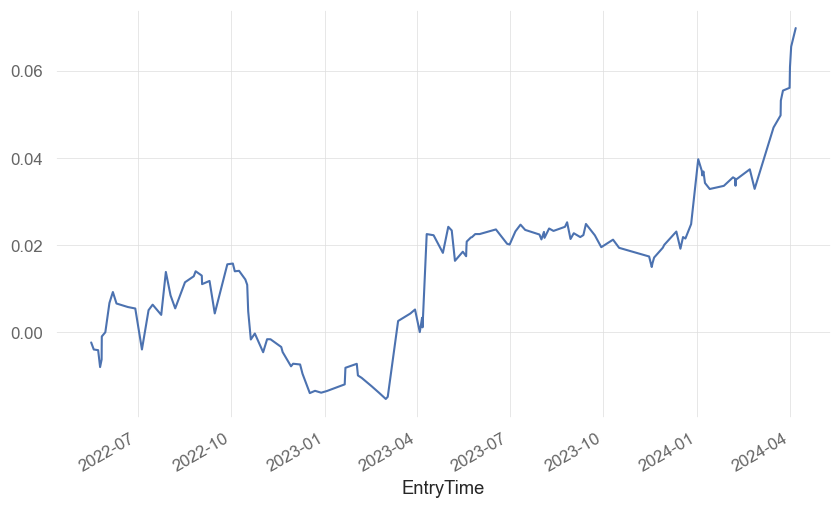

In [ ]:
#%%

position_df['StrategyReturn'] = position_df['Return'] * position_df['Position']
position_df['StrategyCumsum'] = position_df['StrategyReturn'].cumsum()

# Naive cumulative sum
position_df['StrategyCumsum'].plot()

In [ ]:
#%%

# Cost adjustments

position_df['LogReturn'] = (1+position_df['StrategyReturn']).apply(np.log)

slippage_pct  = 0.005 # 0.5BPS 
taker_fee_pct = 0.05  # Binance taker fee is 0.05%
transaction_cost_log = np.log(1-slippage_pct/100.0) + np.log(1-taker_fee_pct/100.0)
position_df['AdjustedLogReturn'] = position_df['LogReturn']  + transaction_cost_log

position_df['CumRet'            ] = 1+position_df['StrategyReturn'].cumsum()
position_df['CostAdjustedCumRet'] = position_df['AdjustedLogReturn'].cumsum().apply(np.exp)

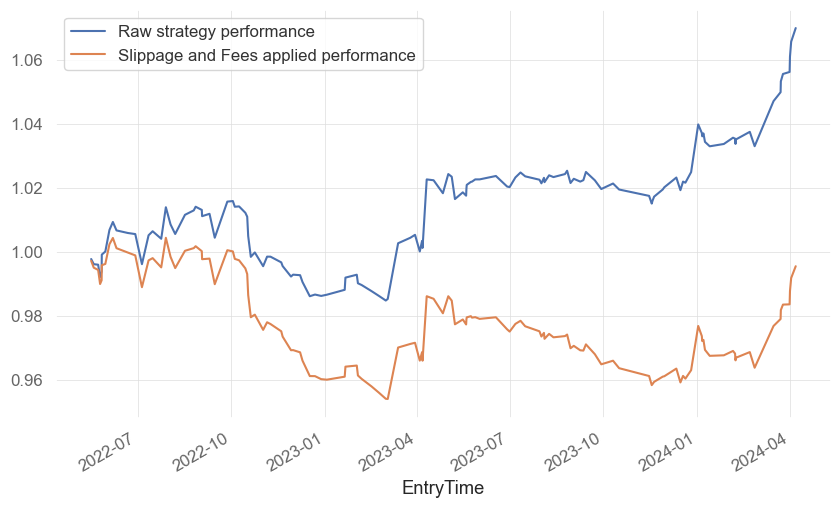

In [ ]:
#%%

position_df[['CumRet', 'CostAdjustedCumRet']].plot()
plt.legend(['Raw strategy performance', 'Slippage and Fees applied performance'])

In [ ]:
#%%

position_df['Account Change'] = position_df['CostAdjustedCumRet'].pct_change()

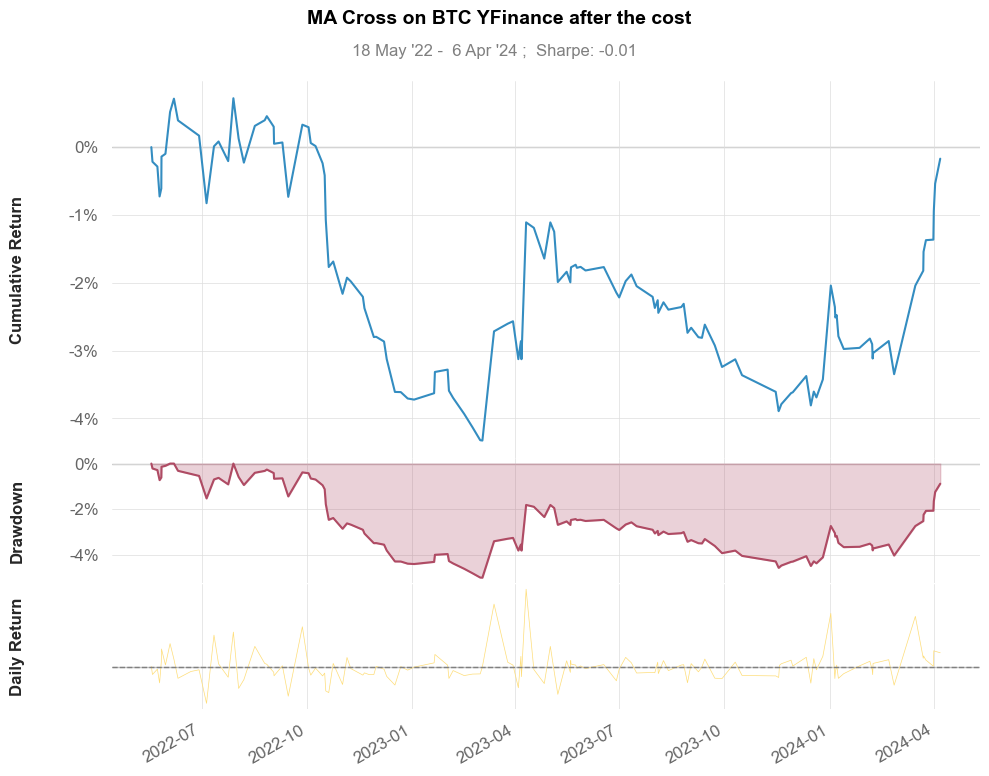

In [ ]:
#%%

qs.plots.snapshot(position_df['Account Change'], title='MA Cross on BTC YFinance after the cost', show=True);

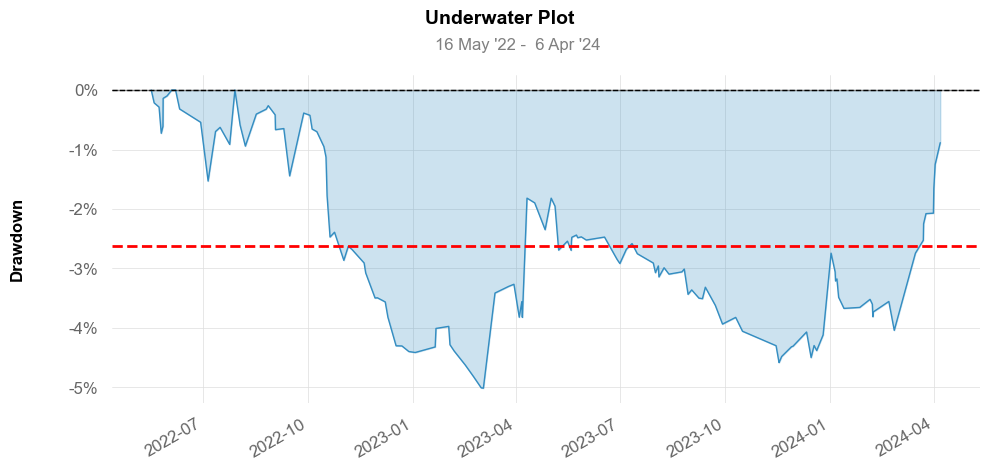

In [ ]:
#%%

qs.plots.drawdown(position_df['Account Change'])

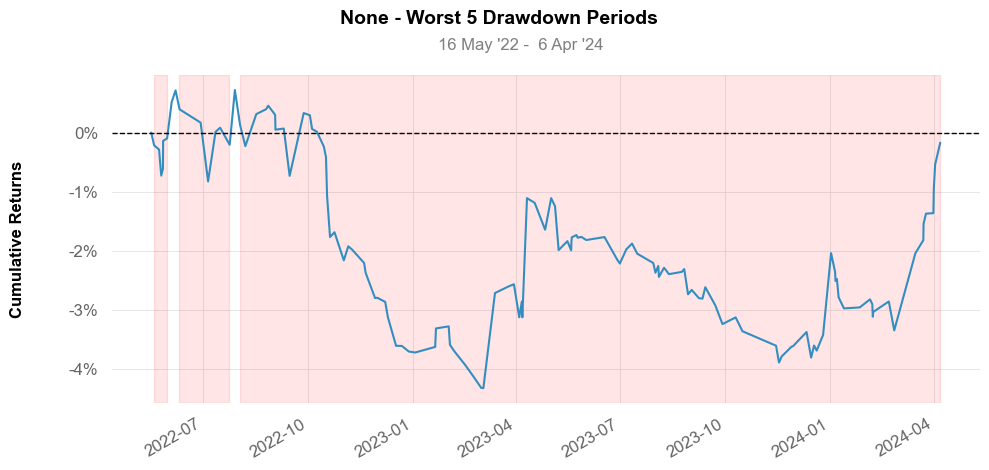

In [ ]:
#%%

qs.plots.drawdowns_periods(position_df['Account Change'])

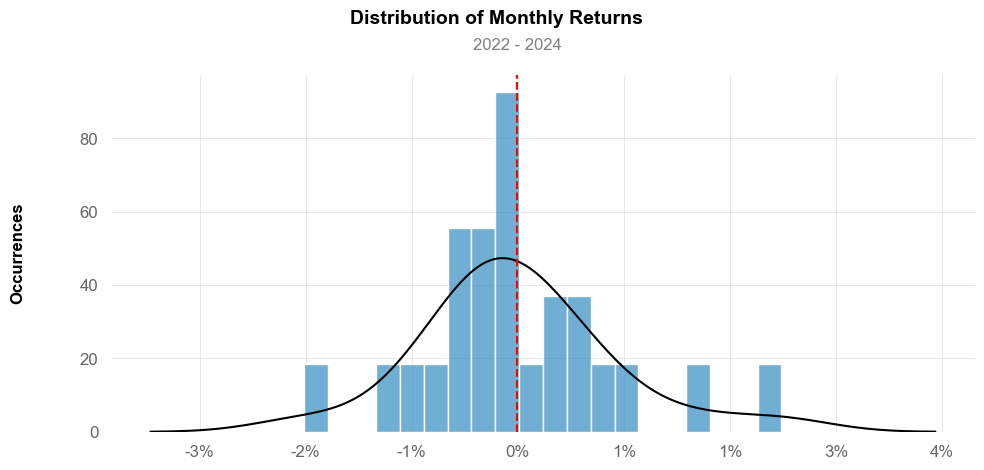

In [ ]:
#%%

qs.plots.histogram(position_df['Account Change'])

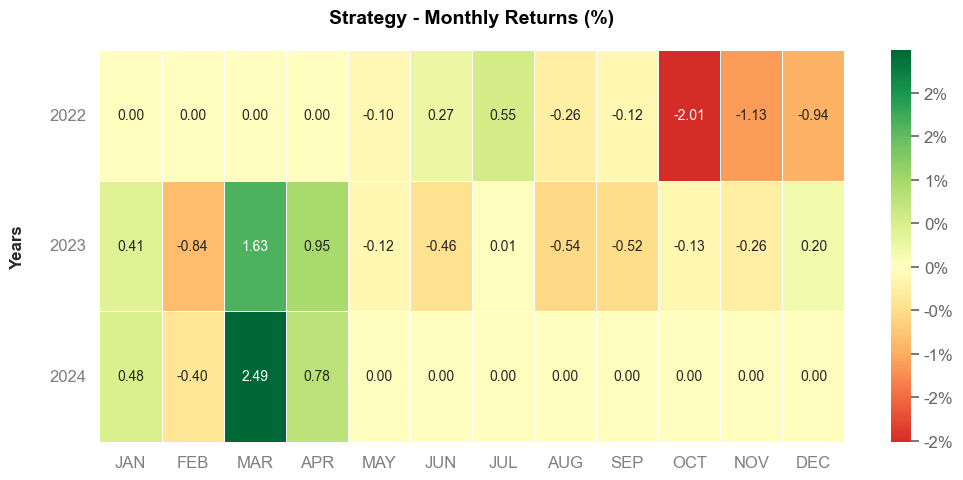

In [ ]:
#%%

qs.plots.monthly_heatmap(position_df['Account Change'])

In [ ]:
#%%

qs.stats.sharpe(position_df['Account Change'])

-0.014078126152614136